In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
wego= pd.read_csv('../data/Headway_Data.csv')

In [3]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
wego.shape

(350329, 30)

In [5]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [6]:
wego['on-time_performance']=(wego['ADJUSTED_ONTIME_COUNT'] *100)/ (
    wego['ADJUSTED_ONTIME_COUNT'] + wego['ADJUSTED_LATE_COUNT'] + wego['ADJUSTED_EARLY_COUNT']
)

In [7]:
wego.head(5)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on-time_performance
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,100.0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,100.0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,100.0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,100.0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,100.0


In [8]:
wego['DATE'] = pd.to_datetime(wego['DATE'])
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'])

In [9]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

wego['Time_of_Day'] = wego['SCHEDULED_TIME'].dt.hour.apply(time_of_day)

In [10]:
wego['Day_of_Week'] = wego['DATE'].dt.day_name()

In [11]:
def calculate_on_time_performance(df):
    return (df['ADJUSTED_ONTIME_COUNT'].sum()*100) / (
        df['ADJUSTED_ONTIME_COUNT'].sum() +
        df['ADJUSTED_LATE_COUNT'].sum() +
        df['ADJUSTED_EARLY_COUNT'].sum())
    

on_time_performance_by_time_of_day = wego.groupby('Time_of_Day').apply(calculate_on_time_performance).reset_index(name='On-time Performance')
on_time_performance_by_time_of_day = on_time_performance_by_time_of_day.round(2)

on_time_performance_by_day_of_week = wego.groupby('Day_of_Week').apply(calculate_on_time_performance).reset_index(name='On-time Performance') 
on_time_performance_by_day_of_week = on_time_performance_by_day_of_week.round(2)

In [12]:
on_time_performance_by_day_of_week

,Day_of_Week,On-time Performance
0,Friday,75.07
1,Monday,84.02
2,Saturday,79.28
3,Sunday,85.26
4,Thursday,78.25
5,Tuesday,80.15
6,Wednesday,79.04


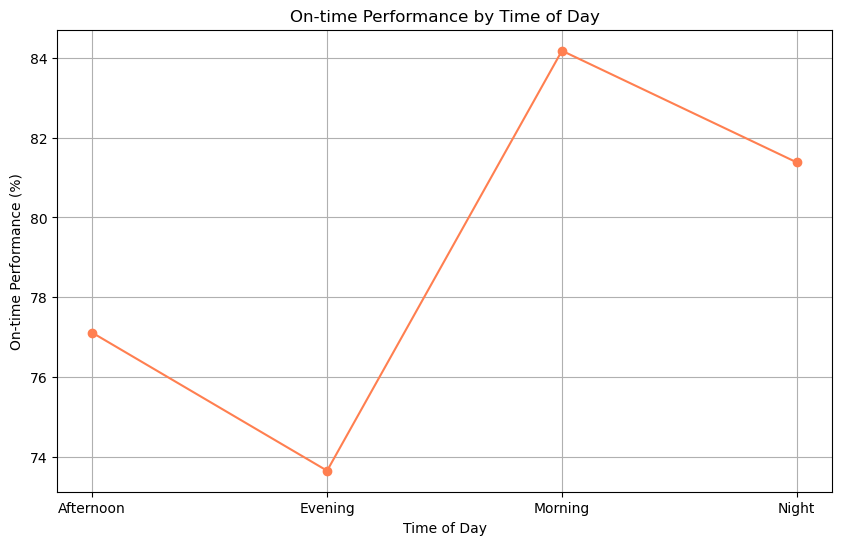

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(on_time_performance_by_time_of_day['Time_of_Day'],on_time_performance_by_time_of_day['On-time Performance'], marker='o', color='coral')
plt.xlabel('Time of Day')
plt.ylabel('On-time Performance (%)')
plt.title('On-time Performance by Time of Day')
plt.grid(True)
plt.show()
plt.savefig('on_time_performance_by_time_of_day')

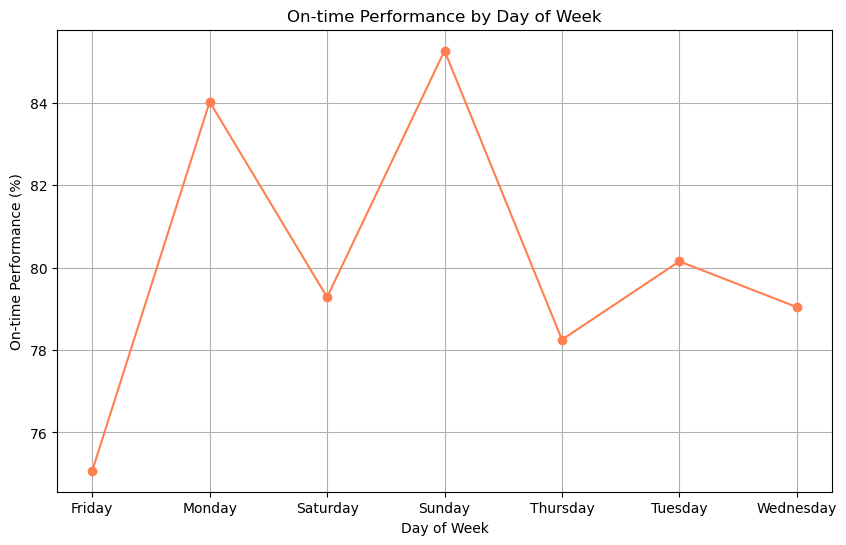

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(on_time_performance_by_day_of_week['Day_of_Week'], on_time_performance_by_day_of_week['On-time Performance'], marker='o', color='coral')
plt.xlabel('Day of Week')
plt.ylabel('On-time Performance (%)')
plt.title('On-time Performance by Day of Week')
plt.grid(True)
plt.show()
plt.savefig('on_time_performance_by_day_of_week')

6. How much impact does being late or too spaced out at the first stop have downstream?  

In [16]:
first_stops=wego[wego['TRIP_EDGE']==1]

In [17]:
first_stops[['HDWY_DEV', 'SCHEDULED_HDWY', 'ACTUAL_HDWY']]

,HDWY_DEV,SCHEDULED_HDWY,ACTUAL_HDWY
0,NaN,NaN,NaN
4,NaN,NaN,NaN
7,2.666666,35.0,37.666666
11,-2.166667,15.0,12.833333
14,-0.200000,60.0,59.800000
...,...,...,...
350314,1.200000,30.0,31.200000
350317,-1.933334,28.0,26.066666
350320,6.716666,30.0,36.716666
350323,4.916666,30.0,34.916666


In [18]:
first_stops['late_spaced'] = (first_stops['ADJUSTED_LATE_COUNT'] > 0) | ((first_stops['HDWY_DEV'] > 0) & (first_stops['HDWY_DEV'] > first_stops['SCHEDULED_HDWY']*0.5))

/var/folders/0n/96_jts790qb22y30bzlhgh_m0000gn/T/ipykernel_2323/1028273736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_stops['late_spaced'] = (first_stops['ADJUSTED_LATE_COUNT'] > 0) | ((first_stops['HDWY_DEV'] > 0) & (first_stops['HDWY_DEV'] > first_stops['SCHEDULED_HDWY']*0.5))


In [19]:
wego_new = pd.merge(wego, first_stops[['TRIP_ID', 'late_spaced']], on='TRIP_ID', how='left')

In [20]:
wego_new.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on-time_performance,Time_of_Day,Day_of_Week,late_spaced
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.5,NaN,100.0,Night,Tuesday,False
1,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.5,NaN,100.0,Night,Tuesday,False
2,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.5,NaN,100.0,Night,Tuesday,False
3,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.0,NaN,100.0,Night,Tuesday,False
4,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.0,NaN,100.0,Night,Tuesday,False


In [21]:
downstream_performance = wego_new[wego_new['TRIP_EDGE'] != 1].groupby('TRIP_ID').agg({'on-time_performance': 'mean','HDWY_DEV': 'mean'}).reset_index()

In [22]:
downstream_performance = pd.merge(downstream_performance, first_stops[['TRIP_ID', 'late_spaced']], on='TRIP_ID')

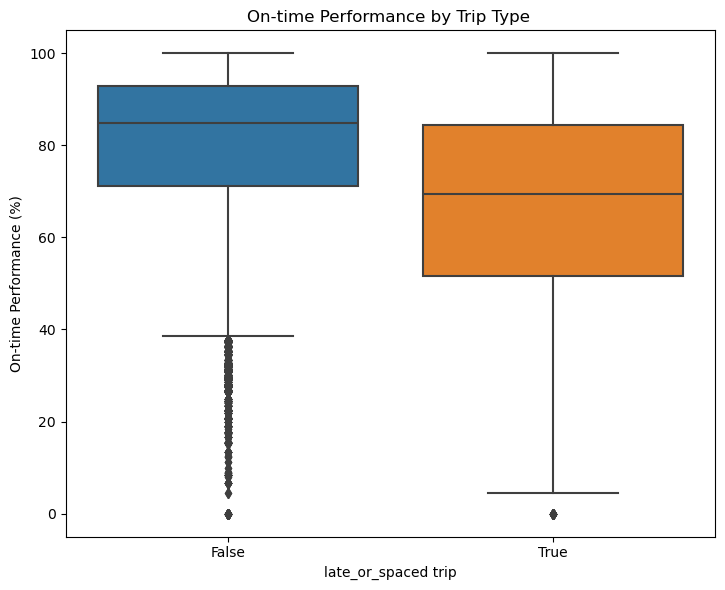

In [23]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='late_spaced', y='on-time_performance', data=downstream_performance)
plt.xlabel('late_or_spaced trip')
plt.ylabel('On-time Performance (%)')
plt.title('On-time Performance by Trip Type ')

plt.tight_layout()
plt.show()

What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? 

In [25]:
first_stops.dtypes

CALENDAR_ID                           int64
SERVICE_ABBR                          int64
ADHERENCE_ID                          int64
DATE                         datetime64[ns]
ROUTE_ABBR                            int64
BLOCK_ABBR                            int64
OPERATOR                              int64
TRIP_ID                               int64
OVERLOAD_ID                           int64
ROUTE_DIRECTION_NAME                 object
TIME_POINT_ABBR                      object
ROUTE_STOP_SEQUENCE                 float64
TRIP_EDGE                             int64
LATITUDE                            float64
LONGITUDE                           float64
SCHEDULED_TIME               datetime64[ns]
ACTUAL_ARRIVAL_TIME                  object
ACTUAL_DEPARTURE_TIME                object
ADHERENCE                           float64
SCHEDULED_HDWY                      float64
ACTUAL_HDWY                         float64
HDWY_DEV                            float64
ADJUSTED_EARLY_COUNT            

In [26]:
first_stops['ACTUAL_ARRIVAL_TIME']=pd.to_datetime(first_stops['ACTUAL_ARRIVAL_TIME'])
first_stops['ACTUAL_DEPARTURE_TIME']= pd.to_datetime(first_stops['ACTUAL_DEPARTURE_TIME'])

/var/folders/0n/96_jts790qb22y30bzlhgh_m0000gn/T/ipykernel_2323/4097270731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_stops['ACTUAL_ARRIVAL_TIME']=pd.to_datetime(first_stops['ACTUAL_ARRIVAL_TIME'])
/var/folders/0n/96_jts790qb22y30bzlhgh_m0000gn/T/ipykernel_2323/4097270731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_stops['ACTUAL_DEPARTURE_TIME']= pd.to_datetime(first_stops['ACTUAL_DEPARTURE_TIME'])


In [27]:
def calculate_layover(row):
    diff = row['ACTUAL_DEPARTURE_TIME'] - row['ACTUAL_ARRIVAL_TIME']
   
    if diff.total_seconds() < 0:
        diff += pd.Timedelta(days=1)
    return diff

first_stops['Layover_Start_Trip'] = first_stops.apply(calculate_layover, axis=1)


/var/folders/0n/96_jts790qb22y30bzlhgh_m0000gn/T/ipykernel_2323/3576679607.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_stops['Layover_Start_Trip'] = first_stops.apply(calculate_layover, axis=1)


In [28]:

first_stops['Layover_Start_Trip_Minutes'] = first_stops['Layover_Start_Trip'].dt.total_seconds() / 60
first_stops.head(2)

/var/folders/0n/96_jts790qb22y30bzlhgh_m0000gn/T/ipykernel_2323/1347510421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_stops['Layover_Start_Trip_Minutes'] = first_stops['Layover_Start_Trip'].dt.total_seconds() / 60


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on-time_performance,Time_of_Day,Day_of_Week,late_spaced,Layover_Start_Trip,Layover_Start_Trip_Minutes
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,6.500000,NaN,100.0,Night,Tuesday,False,0 days 00:06:30,6.500000
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0.0,0,12.866666,5.0,100.0,Morning,Tuesday,False,0 days 00:12:52,12.866667


In [29]:
first_stops['ADHERENCE']

0        -2.133333
4        -1.583333
7        -1.716666
11       -1.316666
14       -1.516666
            ...   
350314   -3.283333
350317   -0.850000
350320   -5.900000
350323   -8.616666
350326   -4.316666
Name: ADHERENCE, Length: 67416, dtype: float64

In [30]:
first_stops['HDWY_DEV %']=first_stops['HDWY_DEV']/first_stops['SCHEDULED_HDWY']

/var/folders/0n/96_jts790qb22y30bzlhgh_m0000gn/T/ipykernel_2323/2650696785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_stops['HDWY_DEV %']=first_stops['HDWY_DEV']/first_stops['SCHEDULED_HDWY']


In [31]:
first_stops['HDWY_DEV %']

0              NaN
4              NaN
7         0.076190
11       -0.144444
14       -0.003333
            ...   
350314    0.040000
350317   -0.069048
350320    0.223889
350323    0.163889
350326    0.062222
Name: HDWY_DEV %, Length: 67416, dtype: float64

In [32]:
first_stops_cleaned = first_stops.replace([np.inf, -np.inf], np.nan).dropna(subset=['DWELL_IN_MINS', 'HDWY_DEV', 'ADHERENCE'])

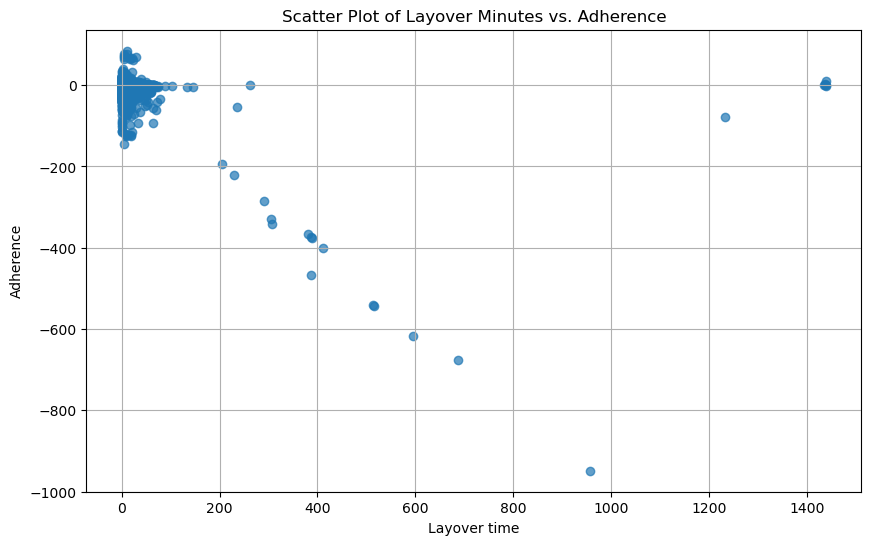

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(x=first_stops_cleaned ['Layover_Start_Trip_Minutes'], y=first_stops_cleaned ['ADHERENCE'], alpha=0.7)
plt.xlabel('Layover time')
plt.ylabel('Adherence')
plt.title('Scatter Plot of Layover Minutes vs. Adherence')
plt.grid(True)
plt.show()

In [34]:
first_stops_cleaned['Layover_Start_Trip_Minutes'].corr(first_stops['ADHERENCE'])

-0.3340332719399936

Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? 

In [36]:
bins = [0, 2, 5, 10, 15, 20]
labels = ['0-2 mins', '2-5 mins', '5-10 mins', '10-15 mins', '15-20 mins']
first_stops_cleaned['Dwell_Time_Bin'] = pd.cut(first_stops_cleaned['DWELL_IN_MINS'], bins=bins, labels=labels, right=False)
first_stops_cleaned.head(2)


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on-time_performance,Time_of_Day,Day_of_Week,late_spaced,Layover_Start_Trip,Layover_Start_Trip_Minutes,HDWY_DEV %,Dwell_Time_Bin
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,13.216666,10.0,100.0,Morning,Tuesday,False,0 days 00:13:13,13.216667,0.076190,10-15 mins
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,10.800000,5.0,100.0,Morning,Tuesday,False,0 days 00:10:48,10.800000,-0.144444,10-15 mins


/var/folders/0n/96_jts790qb22y30bzlhgh_m0000gn/T/ipykernel_2323/1287482095.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = first_stops_cleaned.groupby('Dwell_Time_Bin')['HDWY_DEV %'].mean().reset_index()


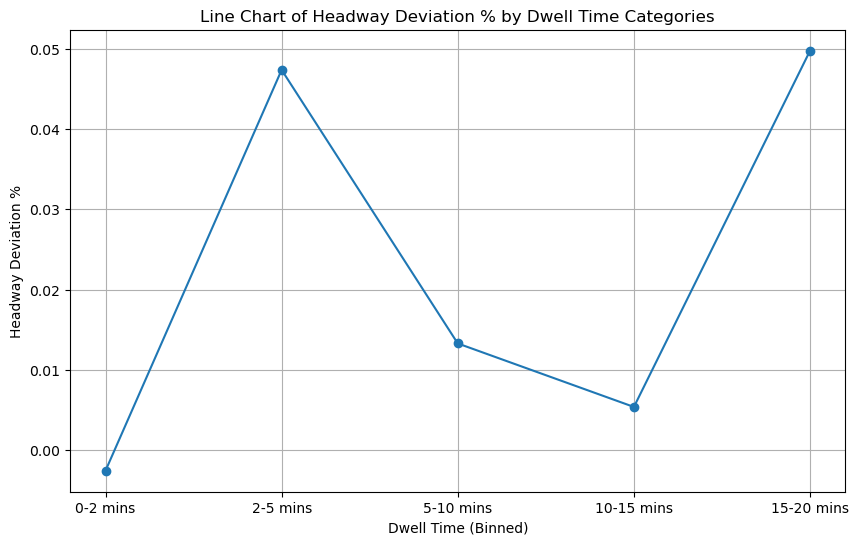

In [37]:

grouped_data = first_stops_cleaned.groupby('Dwell_Time_Bin')['HDWY_DEV %'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Dwell_Time_Bin'], grouped_data['HDWY_DEV %'], marker='o')
plt.xlabel('Dwell Time (Binned)')
plt.ylabel('Headway Deviation %')
plt.title('Line Chart of Headway Deviation % by Dwell Time Categories')
plt.grid(True)
plt.show()

In [38]:
first_stops_cleaned.corr(numeric_only=True)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on-time_performance,late_spaced,Layover_Start_Trip_Minutes,HDWY_DEV %
CALENDAR_ID,1.000000,0.050404,0.710186,-0.000240,-0.000070,0.010989,0.215036,-0.000447,0.001445,NaN,...,0.006292,-0.028791,-0.021996,0.003294,0.024982,0.009901,0.006292,0.027248,0.018729,0.008294
SERVICE_ABBR,0.050404,1.000000,0.046677,-0.002570,-0.004241,0.194572,0.084266,-0.000295,0.023036,NaN,...,0.006453,0.047147,0.040284,0.007557,0.069498,0.092054,0.006453,-0.008346,0.048294,-0.000258
ADHERENCE_ID,0.710186,0.046677,1.000000,0.002999,0.003432,0.003873,0.334791,-0.000721,0.002832,NaN,...,0.023639,-0.044861,-0.042919,0.003761,0.036374,0.013579,0.023639,0.008999,0.022473,0.000028
ROUTE_ABBR,-0.000240,-0.002570,0.002999,1.000000,0.995978,0.025684,0.317078,-0.002004,0.465618,NaN,...,-0.027738,-0.088086,-0.083364,0.040730,0.095530,0.170408,-0.027738,0.039295,0.055418,-0.016546
BLOCK_ABBR,-0.000070,-0.004241,0.003432,0.995978,1.000000,0.027056,0.318907,-0.002006,0.464001,NaN,...,-0.027325,-0.088410,-0.083716,0.039909,0.098401,0.170430,-0.027325,0.039025,0.057198,-0.017045
OPERATOR,0.010989,0.194572,0.003873,0.025684,0.027056,1.000000,0.072908,0.000793,-0.048575,NaN,...,-0.062679,0.035287,0.034046,0.076255,0.000942,0.094442,-0.062679,0.056099,0.004295,0.015191
TRIP_ID,0.215036,0.084266,0.334791,0.317078,0.318907,0.072908,1.000000,0.001989,0.156669,NaN,...,-0.041716,-0.088596,-0.082997,0.013982,0.060360,0.185622,-0.041716,0.050975,0.033396,-0.007276
OVERLOAD_ID,-0.000447,-0.000295,-0.000721,-0.002004,-0.002006,0.000793,0.001989,1.000000,0.007705,NaN,...,-0.009025,-0.003470,0.020025,-0.005600,-0.012756,0.004530,-0.009025,0.007571,-0.008000,0.003110
ROUTE_STOP_SEQUENCE,0.001445,0.023036,0.002832,0.465618,0.464001,-0.048575,0.156669,0.007705,1.000000,NaN,...,0.071688,-0.036017,-0.027608,-0.121817,0.183508,0.418807,0.071688,-0.069729,0.106047,-0.016275
TRIP_EDGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Do trips with longer **scheduled** layover time have more stable headway values? 

In [40]:
first_stops_cleaned['SCHEDULED_LAYOVER_MINUTES'].corr(first_stops_cleaned['HDWY_DEV %'])


-0.003975346240222218

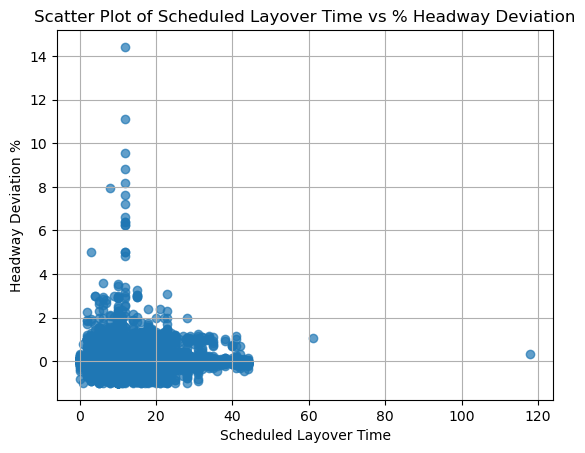

In [41]:
plt.scatter(x=first_stops_cleaned['SCHEDULED_LAYOVER_MINUTES'], y=first_stops_cleaned['HDWY_DEV %'], alpha=0.7)
plt.xlabel('Scheduled Layover Time')
plt.ylabel('Headway Deviation %')
plt.title('Scatter Plot of Scheduled Layover Time vs % Headway Deviation')
plt.grid(True)
plt.show()

What is the relationship between distance or time traveled since the start of a given trip and the adherence value? Does on-time performance become less stable the further along the route the bus has traveled?